In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.svm import LinearSVC



warnings.filterwarnings('ignore')

### Importing dataset

In [46]:
df = pd.read_csv('LoanPrediction.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Y,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,N,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Y,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Y,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Y,1.0,Urban


In [47]:
df.shape

(614, 13)

## finding missing factor

In [48]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df.shape[0] - missing_df['missing_count']) / df.shape[0] * 100
missing_df.sort_values('filling_factor')


,column_name,missing_count,filling_factor
11,Credit_History,50,91.856678
5,Self_Employed,32,94.788274
8,LoanAmount,22,96.416938
3,Dependents,15,97.557003
9,Loan_Amount_Term,14,97.719870
1,Gender,13,97.882736
2,Married,3,99.511401
0,Loan_ID,0,100.000000
4,Education,0,100.000000
6,ApplicantIncome,0,100.000000


## Finding correlations between features 

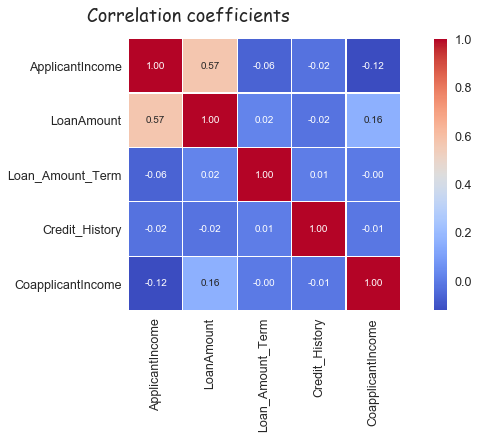

In [49]:
f,ax = plt.subplots(figsize = (12 ,5))
corrmat = df.dropna(how='any').corr()
k = 6 # number of variables for heatmap
cols = corrmat.nlargest(k, 'ApplicantIncome')['ApplicantIncome'].index
cm = np.corrcoef(df[cols].dropna(how='any').values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
f.text(0.5, 0.93, "Correlation coefficients", ha='center', fontsize = 18, family='fantasy')
plt.show()



## Filing Missing values

In [90]:
df.set_index('Loan_ID')
df_filling = df[['ApplicantIncome' , 'LoanAmount']].dropna()
#sc_X = StandardScaler()

lx_train = df['ApplicantIncome'].values

lx_train = sc_X.fit_transform(df_filling['ApplicantIncome'])
ly_train = df['LoanAmount'].values

#regr = linear_model.LinearRegression()
#regr.fit(lx_train.reshape(-1,1), ly_train)


In [29]:
df = df.fillna(method='ffill')


In [30]:
df = df.dropna(how= 'any')
df.shape

(613, 13)

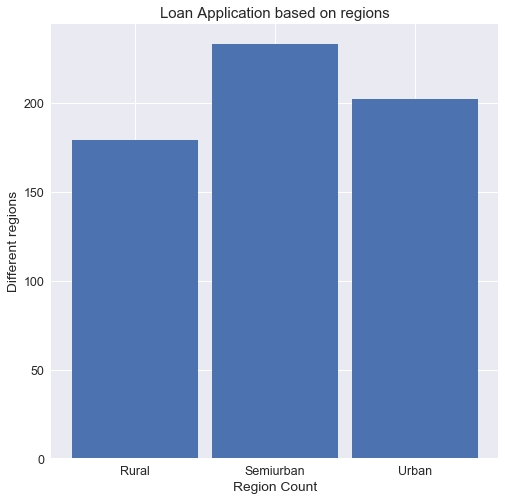

In [75]:
 k = df.groupby('Property_Area').count()
 Rural = k["Loan_ID"][0]
 Semiurban = k["Loan_ID"][1]
 Urban = k["Loan_ID"][2]

 f ,ax = plt.subplots(figsize = (8,8))
 ax.bar([1,2,3] , [Rural,Semiurban,Urban],0.9 ,tick_label = ['Rural' , 'Semiurban' ,'Urban'])
 plt.xlabel('Region Count')
 plt.ylabel('Different regions')
 plt.title('Loan Application based on regions')
  
 
 plt.show()

## Changing binary Answers to 0 / 1


In [31]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Credit_History', 'Property_Area'],
      dtype='object')

In [32]:
# changing Gender - Male to 1 & Female to 0
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0 ,)
df['Married'] = df['Married'].apply(lambda x: 1 if x == 'Yes' else 0 )
df['Education'] = df['Education'].apply(lambda x: 1 if x == 'Graduate' else 0 )
df['Self_Employed'] = df['Self_Employed'].apply(lambda x: 1 if x == 'Yes' else 0 )
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0 )
def pAChange(x):
    if x == 'Urban':
        return 2;
    if x == 'Semiurban':
        return 1;
    else:
        return 0;
    
df['Property_Area'] = df['Property_Area'].apply(pAChange)
df.head(10)



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,0,1.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1,1.0,2
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1,1.0,2
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1,1.0,2
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1,1.0,2
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1,1.0,2
7,LP001014,1,1,3+,1,0,3036,2504.0,158.0,360.0,0,0.0,1
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1,1.0,2
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,0,1.0,1
10,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1,1.0,2


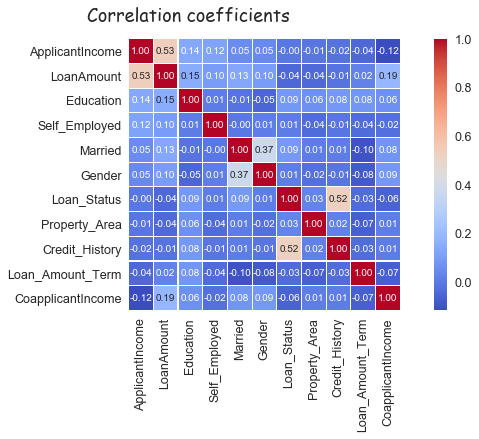

In [33]:
f,ax = plt.subplots(figsize = (12 ,5))
corrmat = df.dropna(how='any').corr()
k = 11 # number of variables for heatmap
cols = corrmat.nlargest(k, 'ApplicantIncome')['ApplicantIncome'].index
cm = np.corrcoef(df[cols].dropna(how='any').values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
f.text(0.5, 0.93, "Correlation coefficients", ha='center', fontsize = 18, family='fantasy')
plt.show()

In [34]:
df.dtypes


Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status            int64
Credit_History       float64
Property_Area          int64
dtype: object

### changing dtype of Dependents

In [35]:
df['Dependents'] = df['Dependents'].apply(lambda x: 5 if x == '3+' else x)
df['Dependents'] = pd.to_numeric(df['Dependents'])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status            int64
Credit_History       float64
Property_Area          int64
dtype: object

In [36]:
df = df.set_index('Loan_ID')


In [37]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,0,1.0,0
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1,1.0,2
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1,1.0,2
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1,1.0,2
LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1,1.0,2


## slipting Data set int training and test 

In [38]:
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area' , 'Credit_History', 'Loan_Status' ]]
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,0,1.0,0
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,2,1.0,1
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,2,1.0,1
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,2,1.0,1
LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,2,1.0,1


In [39]:
X = df.iloc[:,0:11]
y = df.iloc[:,11]
X_train , X_test ,y_train, y_test = train_test_split(X ,y, random_state = 0 ,test_size =0.15)
X_train.shape

(521, 11)

##  Feature Scaling

In [40]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

y_train = y_train.values
y_test = y_test.values 

## deploying and evaluating the logisticRegression

In [41]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
y_pred = LogReg.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[11, 19],
       [ 1, 61]])

In [44]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.37      0.52        30
          1       0.76      0.98      0.86        62

avg / total       0.81      0.78      0.75        92



## Trying out with SVM

In [87]:
SvmClassi = LinearSVC(random_state = 0 ,C = 0.2)
SvmClassi.fit(X_train ,y_train)
y_pred = SvmClassi.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [88]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.37      0.52        30
          1       0.76      0.98      0.86        62

avg / total       0.81      0.78      0.75        92

